In [52]:
# !pip install seaborn

In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from pathlib import Path

# # Use forward slashes directly in the Path constructor,
# # Python handles the conversion internally.
# path_object = Path("D:\kuliah smt 7\kapsel\ets\train")
# path_object

In [4]:
directory_path = 'D:/kuliah smt 7/kapsel/ets/train'
# directory_path = 'D:\\kuliah smt 7\\kapsel\\ets\\train'

all_items = os.listdir(directory_path)
# all_items

In [5]:
# file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
file_path = os.path.join(directory_path, all_items[7])
# print(file_path)
# print(directory_path)

try:
    dfPre_ownedNearby = pd.read_csv(file_path)
    print("CSV data loaded successfully into a pandas DataFrame.")
    # print(df.head()) # Display the first 5 rows to confirm
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

dfPre_ownedNearby.head()

CSV data loaded successfully into a pandas DataFrame.


,month,sector,num_pre_owned_house_transactions_nearby_sectors,area_pre_owned_house_transactions_nearby_sectors,amount_pre_owned_house_transactions_nearby_sectors,price_pre_owned_house_transactions_nearby_sectors
0,2019-Jan,sector 1,6.750000,733.000000,1247.03800,17012.79673
1,2019-Jan,sector 2,64.181818,5339.000000,20880.24282,39108.90208
2,2019-Jan,sector 3,77.714286,7457.142857,17376.21486,23301.43755
3,2019-Jan,sector 4,57.666667,5109.666667,19021.15267,37225.81904
4,2019-Jan,sector 5,45.428571,3763.500000,15800.74143,41984.16747


In [6]:
len(dfPre_ownedNearby['sector'].unique())

81

In [7]:
81*67

5427

In [16]:
# # file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
# file_path = os.path.join(directory_path, all_items[3])
# # print(file_path)
# # print(directory_path)

# try:
#     dfLandNearby = pd.read_csv(file_path)
#     print("CSV data loaded successfully into a pandas DataFrame.")
#     # print(df.head()) # Display the first 5 rows to confirm
# except FileNotFoundError:
#     print(f"Error: File not found at {file_path}. Check the path.")
# except Exception as e:
#     print(f"An error occurred: {e}")

# dfLandNearby.head()

In [17]:
# len(dfLandNearby['sector'].unique())

In [18]:
# 80*67

In [19]:
# # file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
# file_path = os.path.join(directory_path, all_items[5])
# # print(file_path)
# # print(directory_path)

# try:
#     dfNewNearby = pd.read_csv(file_path)
#     print("CSV data loaded successfully into a pandas DataFrame.")
#     # print(df.head()) # Display the first 5 rows to confirm
# except FileNotFoundError:
#     print(f"Error: File not found at {file_path}. Check the path.")
# except Exception as e:
#     print(f"An error occurred: {e}")

# print(len(dfNewNearby['sector'].unique()))
# dfNewNearby.head()

### make encoding of number of transactions

In [12]:
# 1. Group the DataFrame by 'sector'
grouped = dfPre_ownedNearby.groupby('sector')

# 2. Extract the 'num_pre_owned_house_transactions_nearby_sectors' column
# and convert the values for each group into a list
sector_data_lists = grouped['num_pre_owned_house_transactions_nearby_sectors'].apply(list)

# 3. Convert the resulting Series into a dictionary for easy access, if desired
sector_data_dict = sector_data_lists.to_dict()

# Print the resulting dictionary (keys are sectors, values are lists of 67 months)
# sector_data_dict['sector 1']

In [13]:
print("--- Original Dictionary Structure ---")
# print(sector_data_dict)
print("\n" + "="*40 + "\n")

# 2. Transformation Steps

# Step A: Create DataFrame using orient='index'
# This maps the dictionary keys (sectors) to the index, and the list values
# become columns named 0, 1, 2, ... (matching the element index).
df_temp = pd.DataFrame.from_dict(sector_data_dict, orient='index')
print("Step A: DataFrame after from_dict(orient='index')")
# print(df_temp.head())
print("\n" + "="*40 + "\n")

# Step B: Move the index (sector names) into a regular column.
# The new column is automatically named 'index'.
df_final = df_temp.reset_index()

# Step C: Rename the newly created 'index' column to 'sector'
df_final = df_final.rename(columns={'index': 'sector'})

# 3. Display Final Result
print("Step C: Final Transformed DataFrame")
# print(df_final.head())

# To verify the column names (which are the index of the elements)
# print(f"\nFinal Column Names: {list(df_final.columns)}")

# If you had 67 months, your columns would be: ['sector', 0, 1, ..., 66]

# df_final

--- Original Dictionary Structure ---


Step A: DataFrame after from_dict(orient='index')


Step C: Final Transformed DataFrame


In [14]:
df_final['sector'] = df_final['sector'].str.replace('sector ', '').astype(int)
df_final.head()

,sector,0,1,2,3,4,5,6,7,8,...,57,58,59,60,61,62,63,64,65,66
0,1,6.750000,6.250000,9.500000,6.750000,7.750000,8.250000,9.000000,4.000000,9.250000,...,67.500000,71.250000,68.750000,53.750000,34.750000,70.500000,67.000000,54.5,73.500000,69.750000
1,10,55.777778,48.222222,56.333333,92.555556,99.000000,121.888889,112.111111,99.555556,109.555556,...,101.777778,110.222222,105.555556,95.111111,54.333333,105.333333,110.777778,99.0,123.666667,116.333333
2,11,16.750000,13.500000,18.875000,16.625000,21.625000,23.750000,32.125000,16.750000,26.125000,...,34.375000,34.250000,38.125000,28.375000,14.625000,30.125000,26.750000,27.0,37.375000,34.750000
3,12,52.000000,44.571429,46.000000,98.142857,104.142857,128.428571,110.000000,108.714286,104.857143,...,96.428571,111.857143,105.285714,89.571429,54.857143,97.571429,111.000000,96.0,122.285714,112.857143
4,13,47.300000,29.000000,31.200000,37.600000,57.800000,67.000000,57.100000,52.100000,83.900000,...,92.400000,113.000000,101.900000,93.300000,60.000000,107.800000,104.200000,86.8,112.900000,120.300000


### PCA and plot

Explained Variance by PC1: 91.29%
Explained Variance by PC2: 2.87%
Cumulative Explained Variance: 94.15%


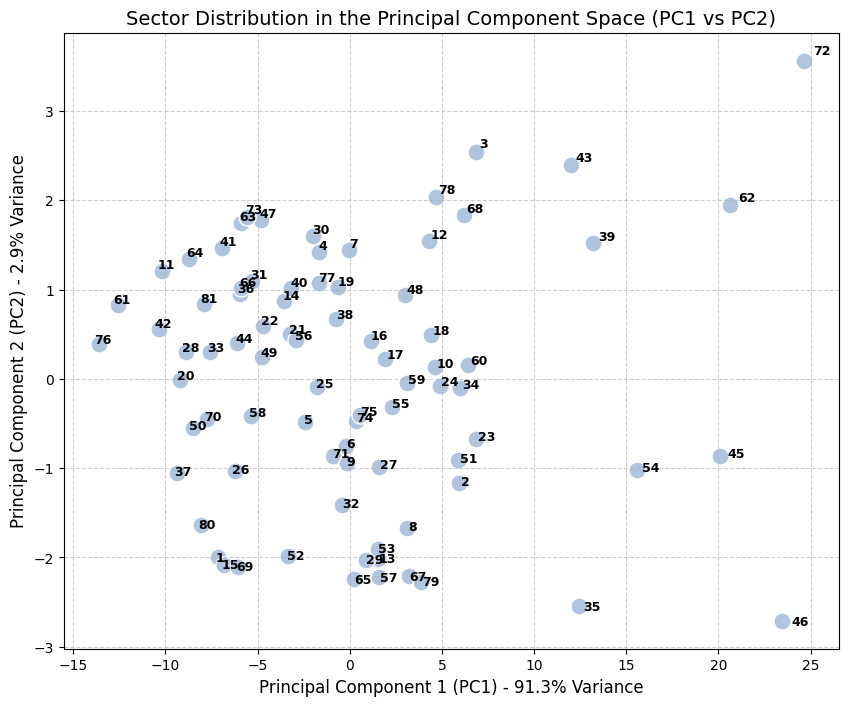

In [31]:
# --- 2. Prepare Data for PCA ---

# Separate the sector names from the numerical data
sectors = df_final['sector']
data_for_pca = df_final.drop('sector', axis=1)

# Standardize the data (Scale to unit variance)
# This is crucial for PCA as it prevents variables with larger ranges from dominating the analysis.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# --- 3. Apply PCA ---

# Initialize PCA to reduce dimensions to 2 components (PC1 and PC2)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# --- 4. Create the Final PCA DataFrame ---

# Create a DataFrame for the Principal Components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the sector names back to the PCA results
df_pca.insert(0, 'sector', sectors)

# print("--- Final PCA DataFrame (Sector, PC1, PC2) ---")
# print(df_pca)
# print("\n" + "="*70 + "\n")

# Report the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]:.2%}")
print(f"Explained Variance by PC2: {explained_variance[1]:.2%}")
print(f"Cumulative Explained Variance: {explained_variance.sum():.2%}")

# --- 5. Plot the Data Distribution ---

plt.figure(figsize=(10, 8))
# Use seaborn for a clear, labeled scatter plot
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    data=df_pca, 
    color='#B0C4DE',
    # hue='sector', # Color points by sector
    s=150,       # Size of points
    # style='sector', # Style of points by sector
    # palette='Spectral' # Color map
)

# Annotate each point with its sector name
for i in range(df_pca.shape[0]):
    plt.text(
        df_pca['PC1'][i] * 1.02,  # Slightly offset x
        df_pca['PC2'][i] * 1.02,  # Slightly offset y
        df_pca['sector'][i],
        fontdict={'weight': 'bold', 'size': 9}
    )

plt.title('Sector Distribution in the Principal Component Space (PC1 vs PC2)', fontsize=14)
plt.xlabel(f'Principal Component 1 (PC1) - {explained_variance[0]*100:.1f}% Variance', fontsize=12)
plt.ylabel(f'Principal Component 2 (PC2) - {explained_variance[1]*100:.1f}% Variance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for legend
# plt.show()
plt.savefig('D:/kuliah smt 7/kapsel/ets/sector_map.png')